In [1]:
from typing import Dict, TypedDict, Optional

In [2]:
class GraphState(TypedDict):
    question: Optional[str] = None
    classification: Optional[str] = None
    response: Optional[str] = None

In [41]:
# !python -m pip install langgraph

In [4]:
from langgraph.graph import StateGraph, END

In [5]:
workflow = StateGraph(GraphState)

In [35]:
def classify(question):
    print(type(question))
    greet_list = ["hello", "hi", "good morning", "good evening", "hey"]
    for g in greet_list:
        if g in question:
            return "greeting"
    return "question"

def classify_input_node(state):
    question = state.get('question', '').strip()
    classification = classify(question)
    return {"classification":classification}

def handle_greeting_node(state):
    return {"response": "Hello! How can I help you!"}

def handle_search_node(state):
    question = state.get('question', '').strip()
    search_result = f"search result for  {question}"
    return {"response": search_result}
    
def decide_next_node(state):
    return "handle_greeting" if state.get('classification') == "greeting" else "handle_search"


In [7]:
# Add nodes to the graph
workflow.add_node("classify_input", classify_input_node)
workflow.add_node("handle_greeting", handle_greeting_node)
workflow.add_node("handle_search", handle_search_node)
workflow.add_conditional_edges("classify_input", decide_next_node,
                              {
                                  "handle_greeting": "handle_greeting",
                                  "handle_search": "handle_search"
                              }
                              )
#set entry points and define end points
workflow.set_entry_point("classify_input")
workflow.add_edge("handle_greeting", END)
workflow.add_edge("handle_search", END)

In [8]:
#compile and run graph

app = workflow.compile()

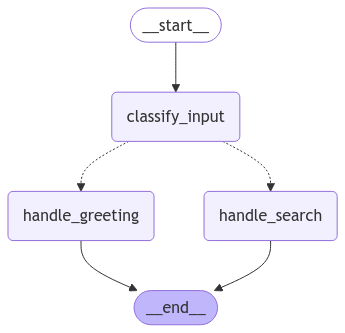

In [15]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

In [39]:
# run the graph
inputs = {"question":"hi, how are you?"}
result = app.invoke(inputs)
print(result)


<class 'str'>
{'question': 'hi, how are you?', 'classification': 'greeting', 'response': 'Hello! How can I help you!'}


In [40]:
# run the graph - 2
inputs = {"question":"tell me about langgraph"}
result = app.invoke(inputs)
print(result)

<class 'str'>
{'question': 'tell me about langgraph', 'classification': 'question', 'response': 'search result for  tell me about langgraph'}
